In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import scipy

In [3]:
df=pd.read_csv('fraud.csv')
df=pd.DataFrame(data=df)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
df.sample()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
29,241,45,596785,04-03-2014,IL,500/1000,2000,1104.5,0,432211,...,NO,91650,14100,14100,63450,Accura,TL,2011,N,NaN


In [6]:
df.shape

(1000, 40)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

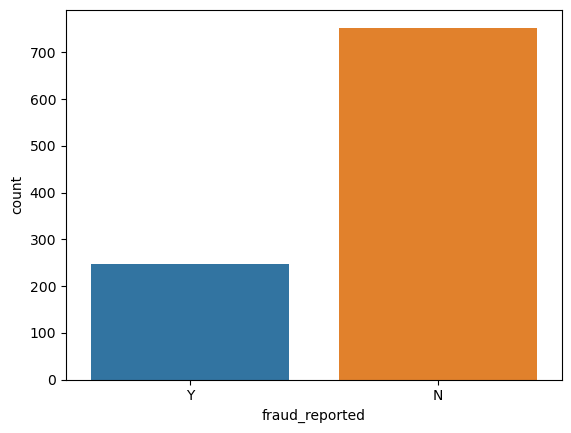

In [11]:
#lets visualize data

sns.countplot('fraud_reported',data=df)
plt.show()

we seem that about 75% data are non-frauds and 25% data are frauds.

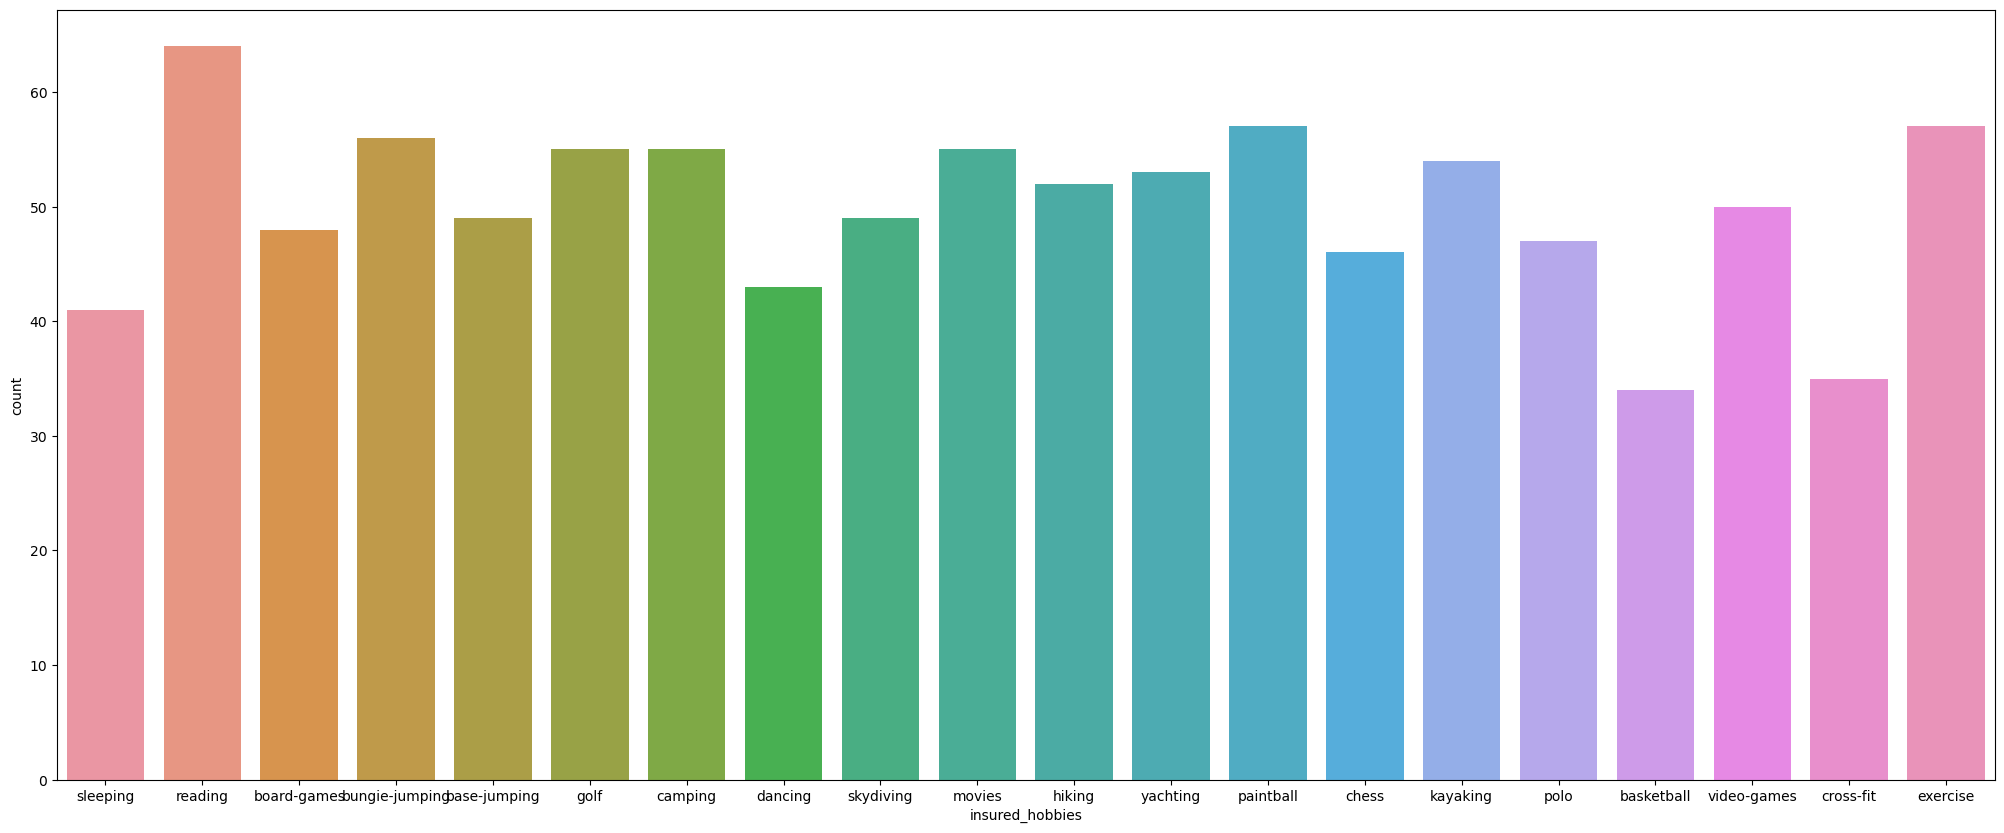

In [12]:
plt.figure(figsize=(25,10))
sns.countplot('insured_hobbies',data=df)
plt.show()

Major incidents severity seems to have the highest fraud cases that exceeds non fraud cases.

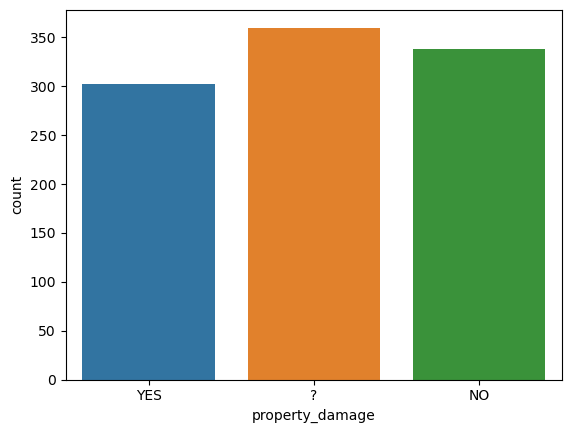

In [13]:
sns.countplot('property_damage',data=df)
plt.show()

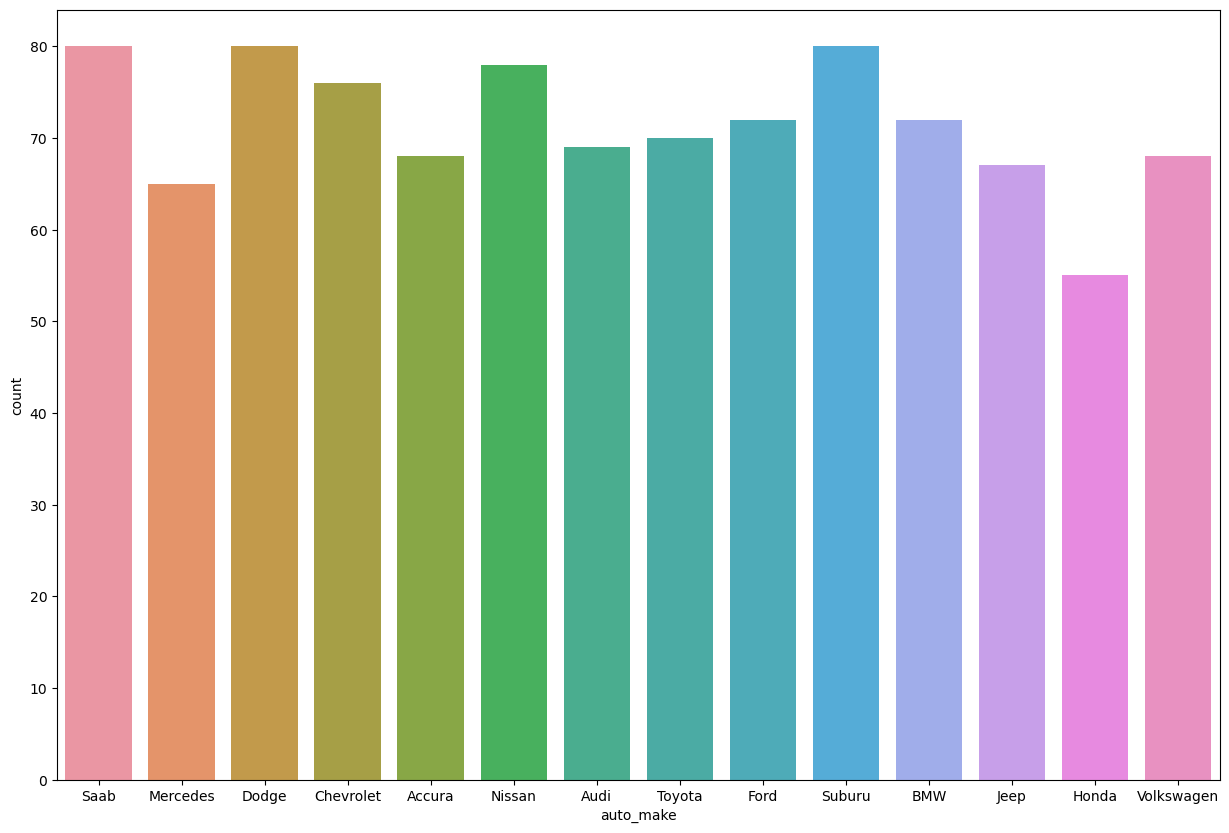

In [14]:
plt.figure(figsize=(15,10))
sns.countplot('auto_make',data=df)
plt.show()

The total_claim_amount is high in saab and subaru auto_make

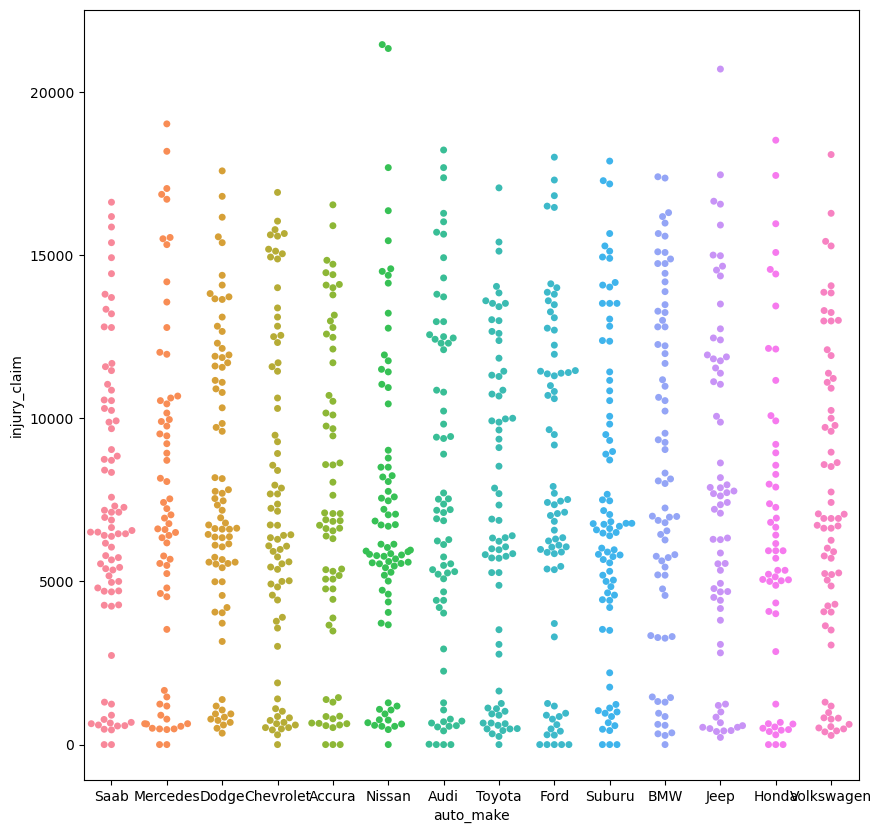

In [15]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='auto_make',y='injury_claim',data=df)
plt.show()

In [16]:
df_corr=df.corr()
df_corr.transpose()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [17]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:>

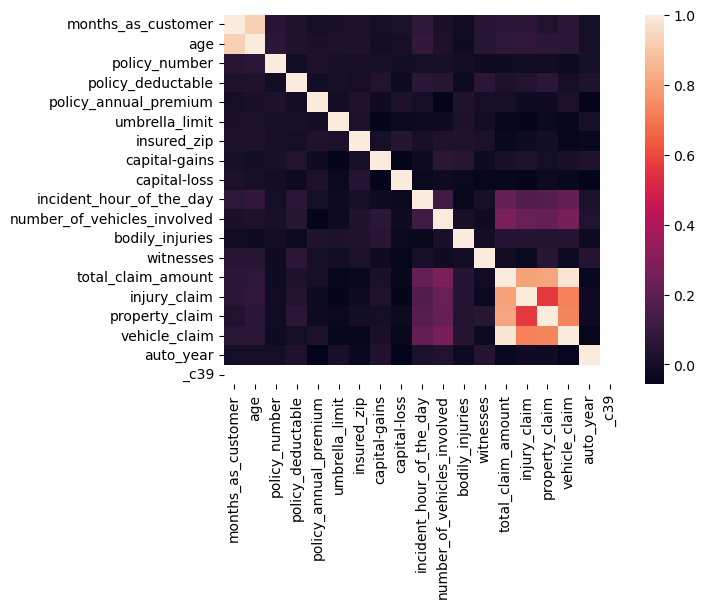

In [18]:
sns.heatmap(df_corr)

In [19]:
#identify variable with '?' values

unknowns={}

for i in list(df.columns):
    if (df[i]).dtype==object:
        j=np.sum(df[i] == '?')
        unknowns[i]= j
        
unknowns = pd.DataFrame.from_dict(unknowns, orient ='index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [20]:
print(df.head())
df=df.replace('?',np.NaN)
replace = df.fillna(df.mode().iloc[0],inplace=True)
print('-'*40)
df.head()

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [21]:

unknowns={}

for i in list(df.columns):
    if (df[i]).dtype==object:
        j=np.sum(df[i] == 'NaN')
        unknowns[i]= j
        
unknowns = pd.DataFrame.from_dict(unknowns, orient ='index')
print(unknowns)

                         0
policy_bind_date         0
policy_state             0
policy_csl               0
insured_sex              0
insured_education_level  0
insured_occupation       0
insured_hobbies          0
insured_relationship     0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities_contacted    0
incident_state           0
incident_city            0
incident_location        0
property_damage          0
police_report_available  0
auto_make                0
auto_model               0
fraud_reported           0


In [22]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [23]:
#we are dropping _c39 is useless data 

df.drop(['_c39'],axis=1,inplace=True)

In [24]:
unknowns={}

for i in list(df.columns):
    if (df[i]).dtype==object:
        j=np.sum(df[i] == '?')
        unknowns[i]= j
        
unknowns = pd.DataFrame.from_dict(unknowns, orient ='index')
print(unknowns)

                         0
policy_bind_date         0
policy_state             0
policy_csl               0
insured_sex              0
insured_education_level  0
insured_occupation       0
insured_hobbies          0
insured_relationship     0
incident_date            0
incident_type            0
collision_type           0
incident_severity        0
authorities_contacted    0
incident_state           0
incident_city            0
incident_location        0
property_damage          0
police_report_available  0
auto_make                0
auto_model               0
fraud_reported           0


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [26]:
df.head().transpose()

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990,06-06-2014
policy_state,2,1,2,0,0
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


all columns in numerical now


In [27]:
#lets check outliers
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


In [28]:
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [58]:
df.head().transpose()

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_state,2,1,2,0,0
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706
insured_sex,1,1,0,0,1
insured_education_level,4,4,6,6,0


In [60]:
df.drop(['policy_csl','authorities_contacted','police_report_available'],axis=1,inplace=True)

In [61]:
df.head().transpose()

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_state,2,1,2,0,0
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706
insured_sex,1,1,0,0,1
insured_education_level,4,4,6,6,0
insured_hobbies,Other,Other,Other,Other,Other


In [62]:
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])

In [65]:
df.head().transpose()

,0,1,2,3,4
months_as_customer,328.00,228.00,134.00,256.00,228.00
age,48.00,42.00,29.00,41.00,44.00
policy_state,2.00,1.00,2.00,0.00,0.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00
insured_zip,466132.00,468176.00,430632.00,608117.00,610706.00
insured_sex,1.00,1.00,0.00,0.00,1.00
insured_education_level,4.00,4.00,6.00,6.00,0.00
insured_hobbies,0.00,0.00,0.00,0.00,0.00


<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

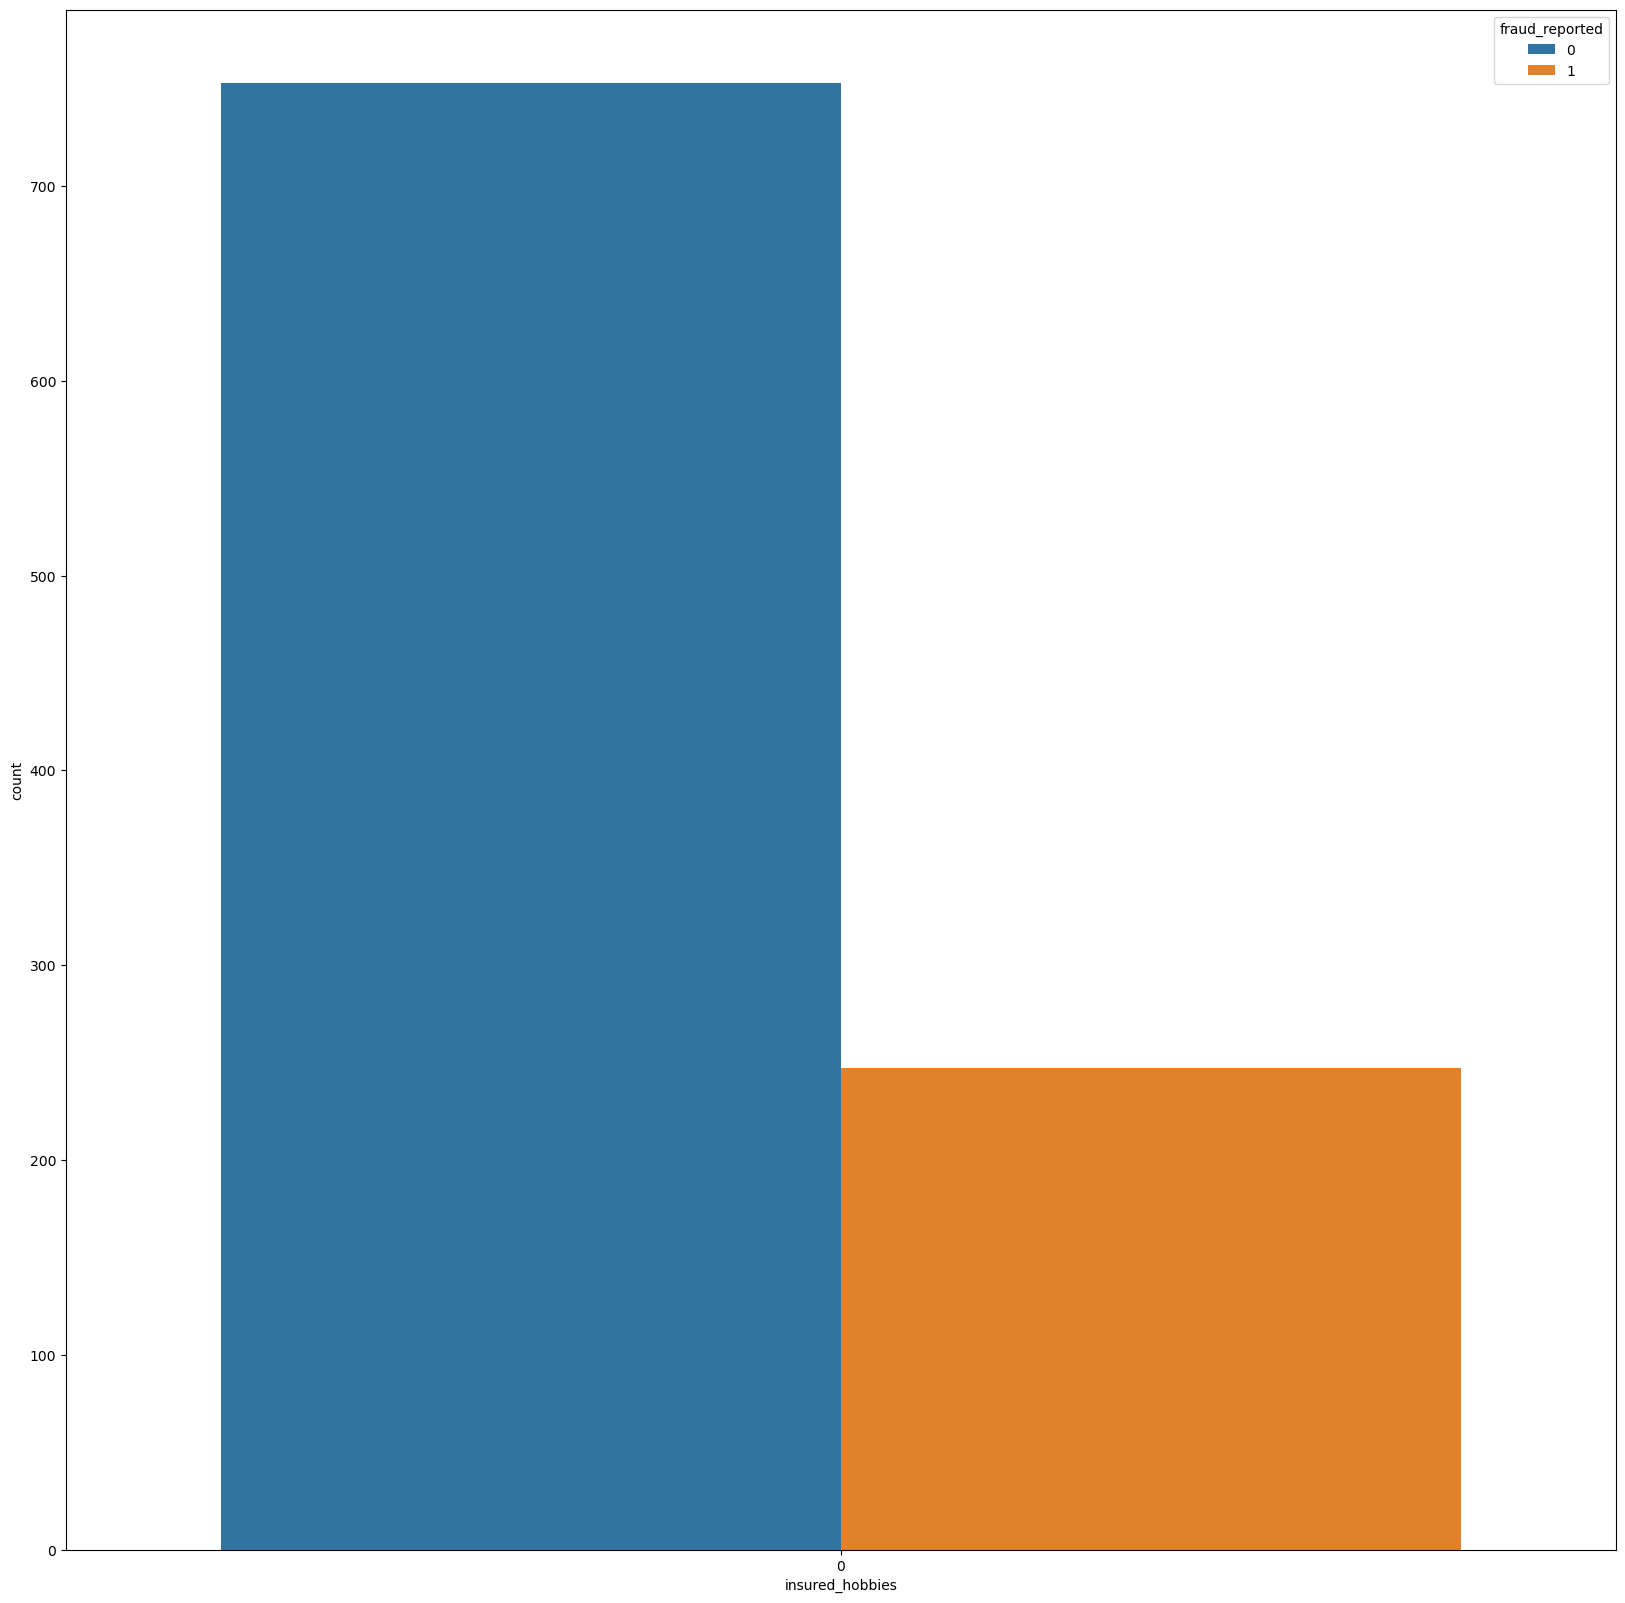

In [66]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

In [67]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

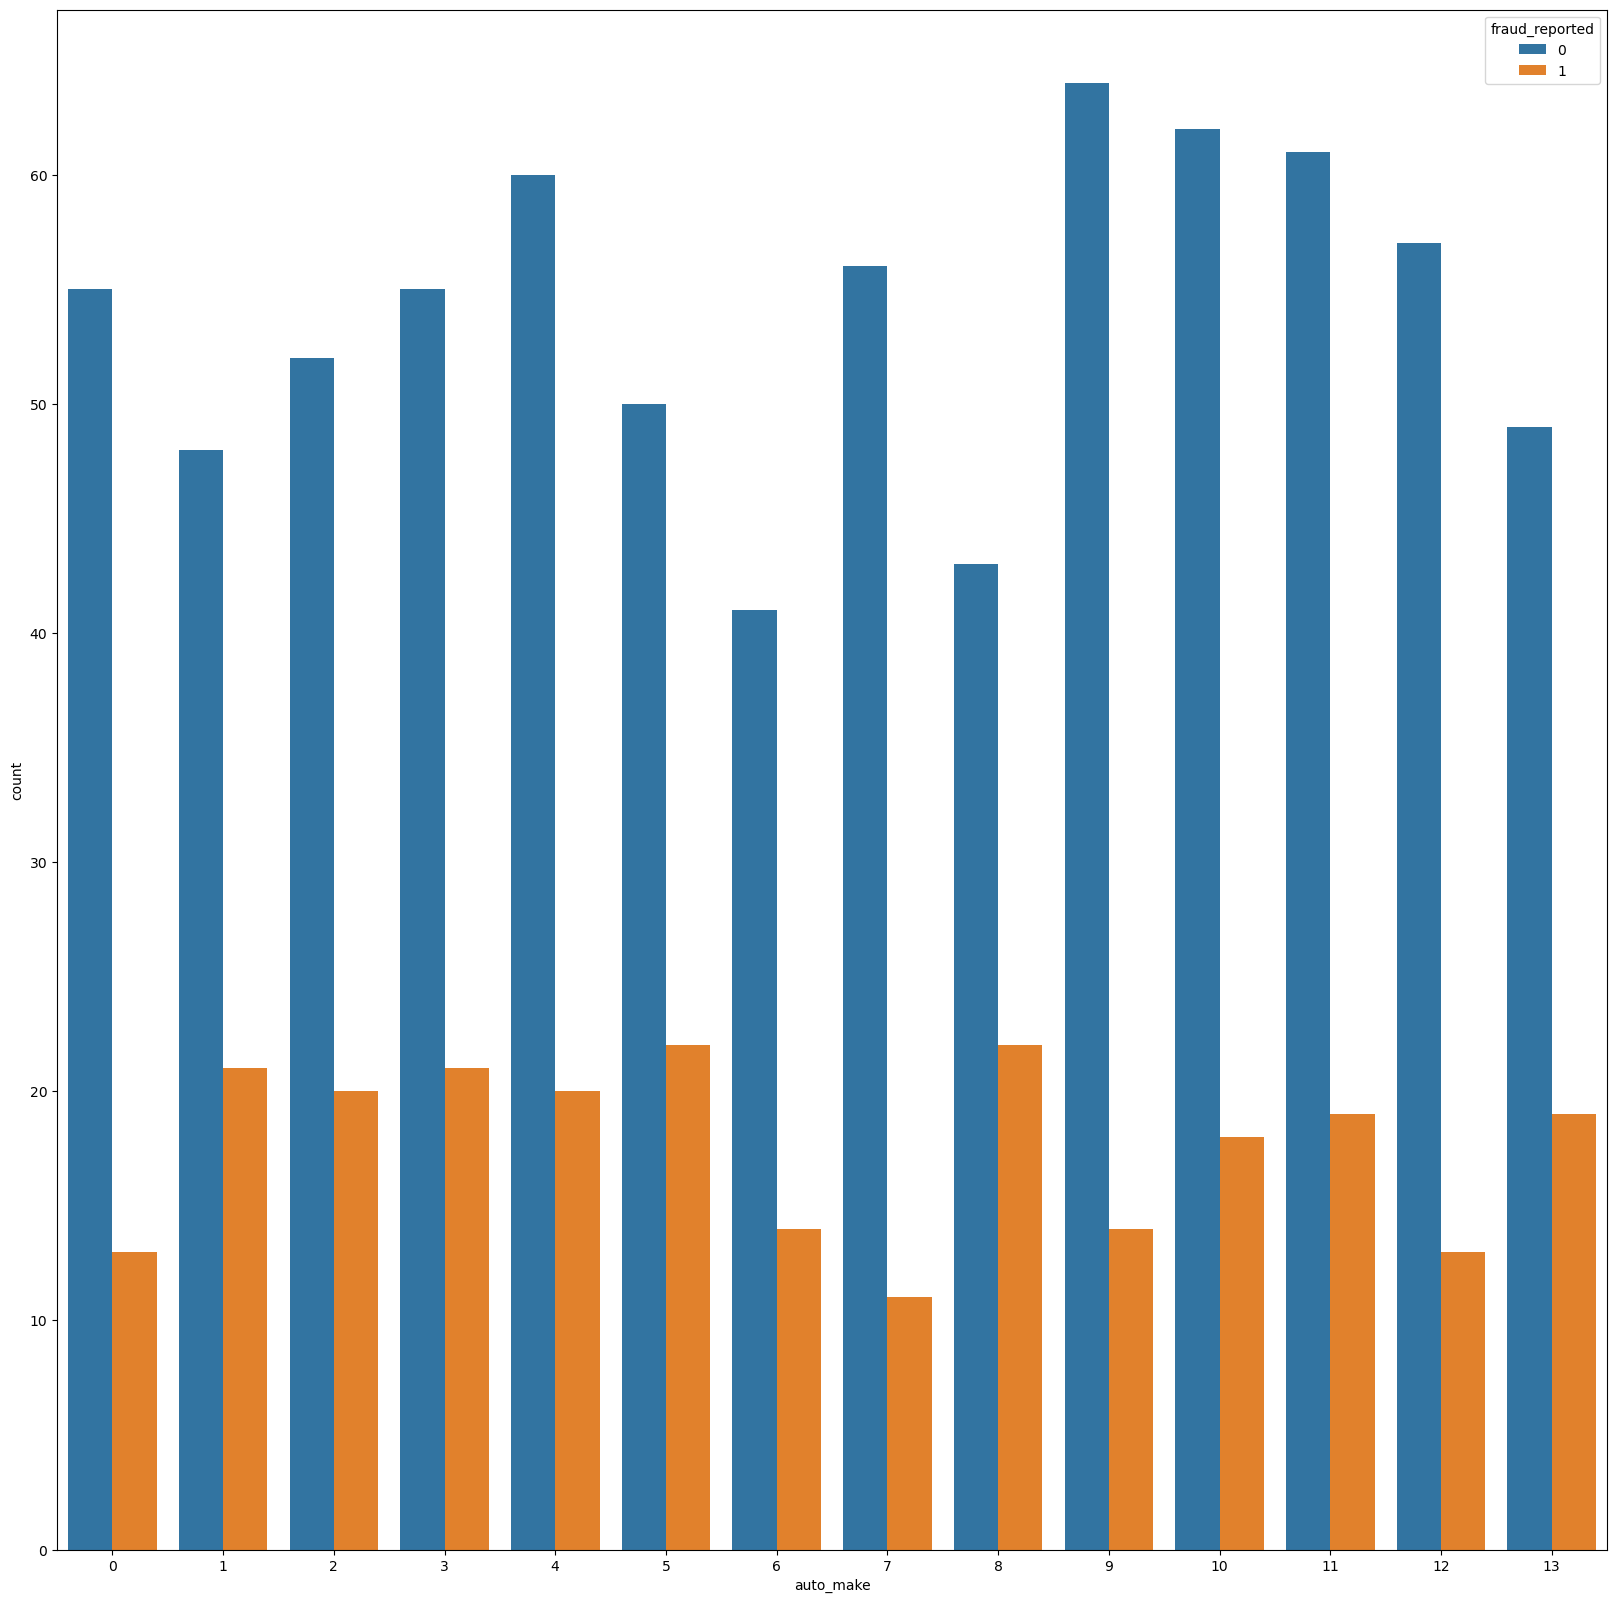

In [68]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

In [69]:
data = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 30)


# Lets check if Data is balanced data or not?

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

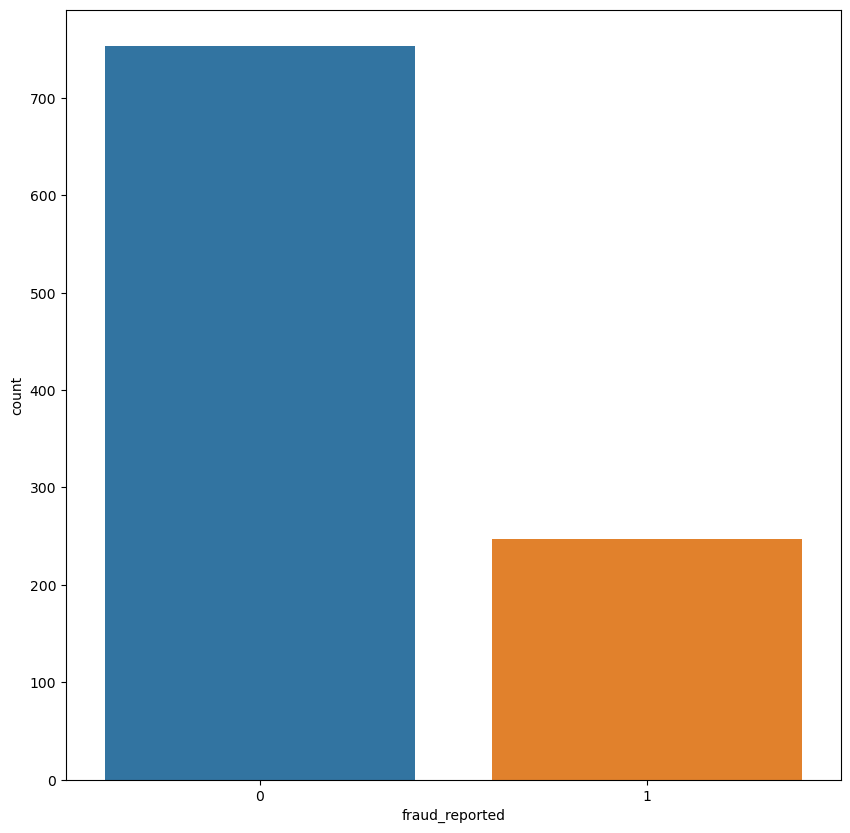

In [70]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=data)

In [71]:
#f, ax = plt.subplots(figsize=(20, 20))
corr= data.corr()
y=df['fraud_reported']
X= df.drop('fraud_reported',axis=1)

In [73]:
X.shape
X.head().transpose()
X['insured_hobbies'] = le.fit_transform(X['insured_hobbies'])

In [75]:
X.head().transpose()

,0,1,2,3,4
months_as_customer,328.00,228.00,134.00,256.00,228.00
age,48.00,42.00,29.00,41.00,44.00
policy_state,2.00,1.00,2.00,0.00,0.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00
insured_zip,466132.00,468176.00,430632.00,608117.00,610706.00
insured_sex,1.00,1.00,0.00,0.00,1.00
insured_education_level,4.00,4.00,6.00,6.00,0.00
insured_hobbies,0.00,0.00,0.00,0.00,0.00


In [76]:
y.shape
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
from collections import Counter

In [91]:
X_smote,y_smote=smote.fit_resample(X,y)

print('Original dataset shape',Counter(y))
print('Resample dataset shape',Counter(y_smote))

Original dataset shape Counter({0: 753, 1: 247})
Resample dataset shape Counter({1: 753, 0: 753})


In [93]:
X.shape

(1000, 29)

In [94]:
y.shape

(1000,)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
#By using Logistic Regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test,predlr)*100))
print('f1_Score : {}'.format(f1_score(y_test,predlr)*100))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy Score : 76.0
f1_Score : 0.0
[[228   1]
 [ 71   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       229
           1       0.00      0.00      0.00        71

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300



In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [104]:
knn=KNeighborsClassifier() #KNearest Neibour 
rf=RandomForestClassifier() # Random Forest
svm=SVC()              # support vactor classifier        
gd=GradientBoostingClassifier() #Gradient Boosting Classifier
dtc=DecisionTreeClassifier()
model=[knn,rf,svm,gd,dtc]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    print(m)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('-'*100)
    print('\n')

KNeighborsClassifier()
Accuracy score of KNeighborsClassifier() is:
0.7266666666666667
[[206  23]
 [ 59  12]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       229
           1       0.34      0.17      0.23        71

    accuracy                           0.73       300
   macro avg       0.56      0.53      0.53       300
weighted avg       0.67      0.73      0.69       300

----------------------------------------------------------------------------------------------------


RandomForestClassifier()
Accuracy score of RandomForestClassifier() is:
0.8133333333333334
[[215  14]
 [ 42  29]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       229
           1       0.67      0.41      0.51        71

    accuracy                           0.81       300
   macro avg       0.76      0.67      0.70       300
weighted avg       0.80      0.81      0.80       300

-------------------

we got our best model i.e. RandomForestClassifier with the accuracy score of 81.33%. Here our model predicts 215 true positive cases out of 229 positive cases and 29 true negative cases out of 71 cases. It predicts 14 false positive cases out of 229 positive cases and 42 false negative cases out of 71 cases. It gives the f1 score of 81.33%.

In [112]:
# Hyperparameter tuning

#creating parameter list to pass in Grid Search CV

parameter = {'n_estimators':np.arange(50,200,10),
            'criterion':['gini','entropy'],
            'max_depth': np.arange(2,8)}

In [117]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(), parameter)
GCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [118]:
#now we will find the best parameters
GCV.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 130}

In [120]:
mod=RandomForestClassifier(criterion='gini', max_depth=7,n_estimators=180)
mod.fit(X_train,y_train)
prediction=mod.predict(X_test)
print('Accuracy Score : {:.2f}'.format(accuracy_score(y_test, prediction)*100))

Accuracy Score : 79.00


In [121]:
from sklearn.metrics import roc_auc_score

In [122]:
roc_auc_score(y_test,pred)

0.7881173503905529

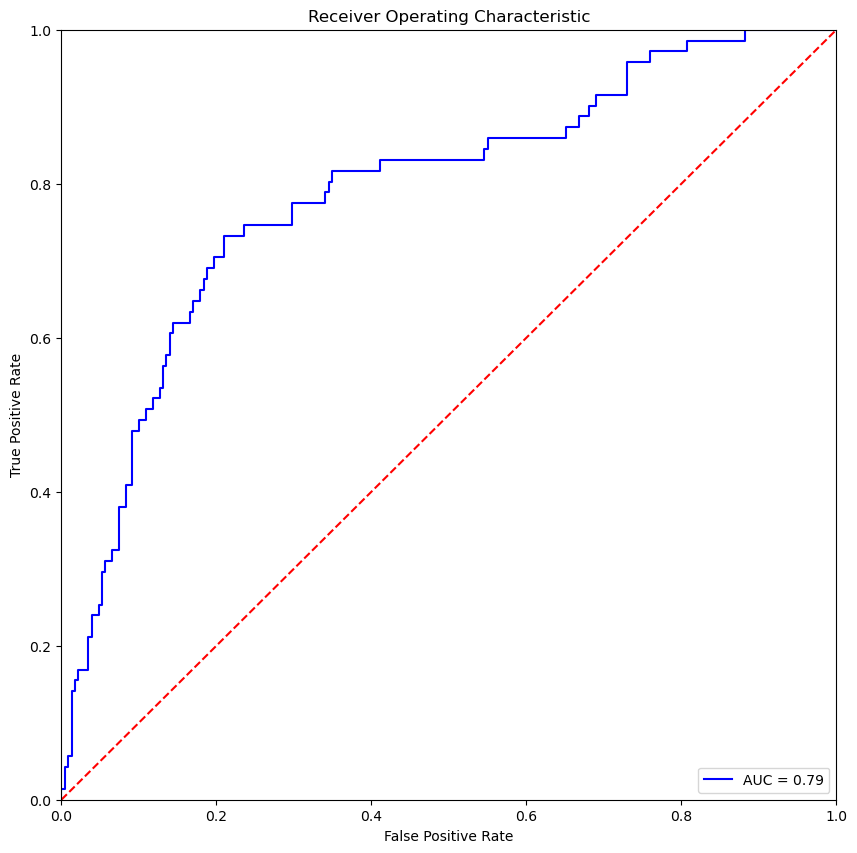

In [123]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Classifier gives us the best model

In [124]:
#use pickle to save our model so that we can use it later
import pickle
pickle.dump(rf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))